# Project: Investigate TMDb Movie Data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling and Cleaning</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> This is my analysis of the TMDb movie dataset. Specifically I'll investigate the relations that directors, actors and budget  have with a movies' rating and profit based on the data from The Movie Database (TMDb). The dataset in question includes more than 10000 rows of movie information relevant to my analysis.

> The questions to be answered are:

> -  Which is the top 10 of more expensive movies?
> -  How do budgets affect revenues?
> -  Is there a correlation between budget and movies' rating?
> -  What are the top 5 directors in regard with the most profitable movie?


In [26]:
# Importing needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime as dt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling and Cleaning


### General Properties

In [27]:
# First lets load the data and print out a few lines. Perform operations to inspect data
# types and look for instances of missing or possibly wrong data.
df_movies_v1 = pd.read_csv('tmdb-movies.csv')
df_movies_v1.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


> Examine the shape of the dataframe, finding 10866 rows, or movies, and 21 columns.

In [28]:
df_movies_v1.shape

(10866, 21)

> From the data set above and having in mind the questions that I have to answer there are some columns that doesn't add anything usefull to my analysis and therefore have to be deleted. For example homepage, and tagline columns, keywords and overview columns contain very specialized information about the movie and is irrelevant to the questions to be answered.

In [29]:
# not needed columns
not_needed_cols = [ 'id', 'imdb_id', 'popularity', 'homepage', 'tagline', 'keywords', 'overview', 'production_companies', 'budget_adj', 'revenue_adj']

In [30]:
# using the variable 'not_needed_columns' to drop the columns from the dataframe
df_movies_v2 = df_movies_v1.drop(not_needed_cols, 1)
#the new dataframe now becomes
df_movies_v2.head()

,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year
0,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015
1,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015
2,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015
3,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015
4,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,4/1/15,2947,7.3,2015


> This version of the dataframe is more compact and gives opportunities for analysis without the burden of extra information. I'll continue with checking the datatypes for incosistencies and for null values.

#### Check for general info, data types and null values of the dataframe.

In [31]:
df_movies_v2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   budget          10866 non-null  int64  
 1   revenue         10866 non-null  int64  
 2   original_title  10866 non-null  object 
 3   cast            10790 non-null  object 
 4   director        10822 non-null  object 
 5   runtime         10866 non-null  int64  
 6   genres          10843 non-null  object 
 7   release_date    10866 non-null  object 
 8   vote_count      10866 non-null  int64  
 9   vote_average    10866 non-null  float64
 10  release_year    10866 non-null  int64  
dtypes: float64(1), int64(5), object(5)
memory usage: 933.9+ KB


> From the above information there are  3 columns (cast, director, genres) with null values that I'll remove it since the sum of null values is about 1.3% (as the following line of code shows) of the dataframe and it will not change the results of my analysis. The release_year column doesn't bother me because I'll not perform any numeric operation on it.

In [32]:
df_movies_v2.isnull().sum()

budget             0
revenue            0
original_title     0
cast              76
director          44
runtime            0
genres            23
release_date       0
vote_count         0
vote_average       0
release_year       0
dtype: int64

> Next I'll check if the numerical columns (budget, revenue, runtime, vote_count, vote_average) have any zero values. The decision to be made is if I'll remove the zero rows (if any) or I'll replace them with some other value. Lets find out if there are any zero rows and how many there are.

In [33]:
df_movies_v2[df_movies_v2.budget == 0].shape[0]

5696

In [34]:
df_movies_v2[df_movies_v2.revenue == 0].shape[0]

6016

In [35]:
df_movies_v2[df_movies_v2.runtime == 0].shape[0]

31

In [36]:
df_movies_v2[df_movies_v2.vote_count == 0].shape[0]

0

In [37]:
df_movies_v2[df_movies_v2.vote_average == 0].shape[0]

0

> It seems that there are a lot of rows with zero values and it wiil affect my analysis significant. My choice is to replace the zero values with the mean for each column. My choice was taken after I check the mean value of the columns in the cases of
 - original data:
> budget = 1.462570e+07, revenue = 3.982332e+07, runtime = 102.070863
 - data with the zero value replaced with null values (and after drop the null values):
> budget = 3.073943e+07, revenue = 8.922066e+07, runtime = 102.362898
 - data with the zero values replaced by the mean:
> budget = 2.229255e+07, revenue = 6.187164e+07, runtime = 102.362065

> which in my opinion shows that the mean values are more succeptible to false results if I replace the original data with NULL values rather than I replace it with the mean values of the whole data.

In [38]:
df_movies_v2.budget.describe()

count    1.086600e+04
mean     1.462570e+07
std      3.091321e+07
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.500000e+07
max      4.250000e+08
Name: budget, dtype: float64

In [39]:
replaced_values = ['budget', 'revenue', 'runtime']
df_movies_v3 = df_movies_v2.copy()
for value in replaced_values:
    df_movies_v3[value].replace(0, df_movies_v3[value].mean(), inplace=True)

> I'll remove any duplicate rows, any NULLS and I'll change the release_date data type to datetime in order to finalize my data set. I'll also change back the data types of budget, revenue and runtime to int64.

In [40]:
# Check if there is duplicated rows
df_movies_v3.duplicated().sum()

1

In [41]:
df_movies_final = df_movies_v3.copy()
df_movies_final.drop_duplicates(inplace=True)
df_movies_final.dropna(axis = 0, inplace = True)
df_movies_final['release_date']= pd.to_datetime(df_movies_final['release_date'])

In [42]:
df_movies_final['budget'] = df_movies_final['budget'].astype('int64')
df_movies_final['revenue'] = df_movies_final['revenue'].astype('int64')
df_movies_final['runtime'] = df_movies_final['runtime'].astype('int64')

In [43]:
df_movies_final.info()
df_movies_final.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10731 entries, 0 to 10865
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   budget          10731 non-null  int64         
 1   revenue         10731 non-null  int64         
 2   original_title  10731 non-null  object        
 3   cast            10731 non-null  object        
 4   director        10731 non-null  object        
 5   runtime         10731 non-null  int64         
 6   genres          10731 non-null  object        
 7   release_date    10731 non-null  datetime64[ns]
 8   vote_count      10731 non-null  int64         
 9   vote_average    10731 non-null  float64       
 10  release_year    10731 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(5), object(4)
memory usage: 1006.0+ KB


(10731, 11)

> Let's take a first look into visualizing the data.

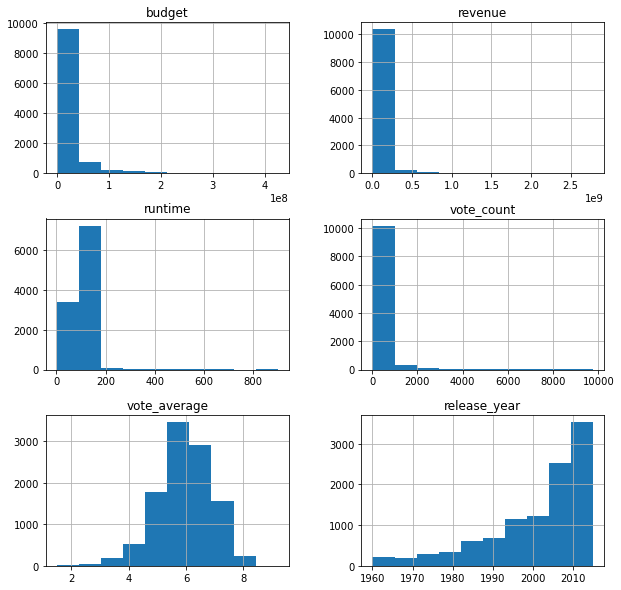

In [44]:
df_movies_final.hist(figsize = (10, 10));

<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1: Which is the top 10 of more expensive movies?

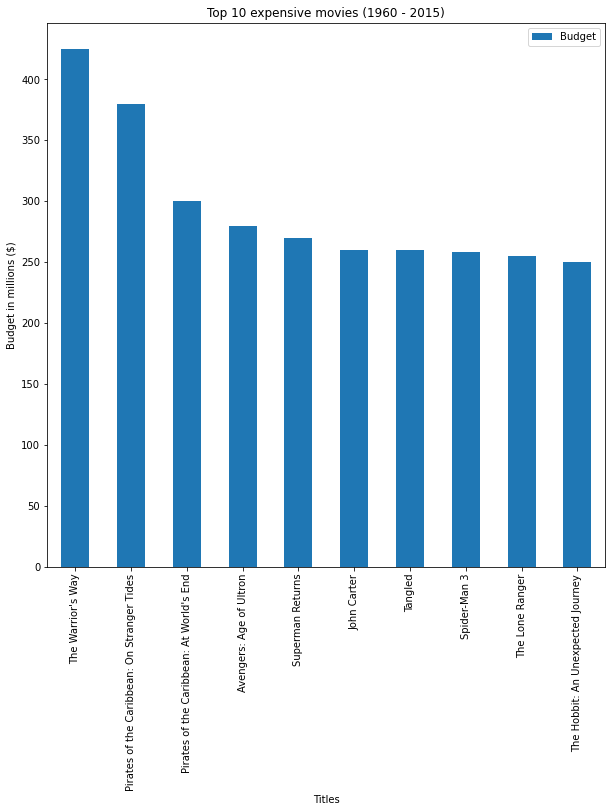

In [45]:
# A bar plot showing the 10 most expensive movies
sorted_budget = df_movies_final['budget'].sort_values(ascending=False)[:10] / 1000000

budget_plot=pd.DataFrame()
titles=[]
budget=[]
for i in sorted_budget.index:
    titles.append(df_movies_final.loc[i,'original_title'])
    budget.append(sorted_budget.loc[i])
budget_plot['Titles']=titles
budget_plot['Budget']=budget
budget_plot.set_index('Titles',inplace=True)
budget_plot.plot(kind ='bar',figsize=(10,10))
plt.title('Top 10 expensive movies (1960 - 2015)');
plt.ylabel('Budget in millions ($)');

In [46]:
budget_plot

,Budget
Titles,
The Warrior's Way,425.0
Pirates of the Caribbean: On Stranger Tides,380.0
Pirates of the Caribbean: At World's End,300.0
Avengers: Age of Ultron,280.0
Superman Returns,270.0
John Carter,260.0
Tangled,260.0
Spider-Man 3,258.0
The Lone Ranger,255.0


### Research Question 2: How do budgets affect revenues?

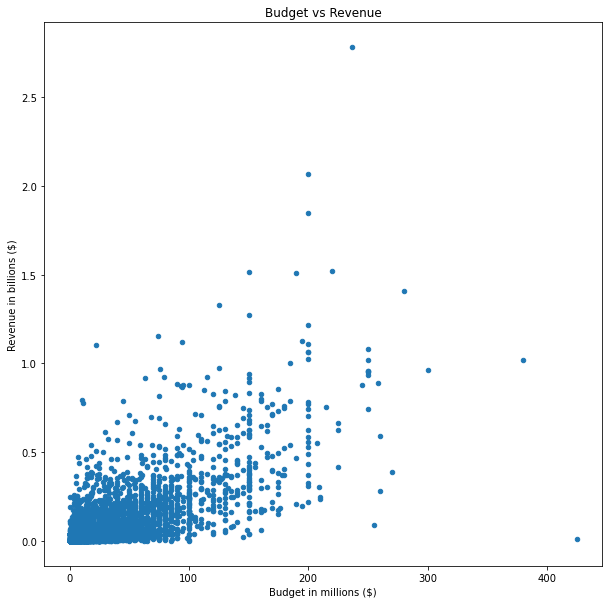

In [59]:
# A scatter plot for exploring correlation between budget and revenue
budget = df_movies_final['budget'] / 1000000
revenue = df_movies_final['revenue'] / 1000000000
budget_plot=pd.DataFrame()
budget_plot['budget']=budget
budget_plot['revenue']=revenue
budget_plot.plot(x='budget',y='revenue',kind='scatter',figsize=(10,10));
plt.title('Budget vs Revenue')
plt.xlabel('Budget in millions ($)');
plt.ylabel('Revenue in billions ($)');

In [63]:
budget_plot.sort_values(by='revenue', ascending=False).head(10)

,budget,revenue
1386,237.0,2.781506
3,200.0,2.068178
5231,200.0,1.845034
4361,220.0,1.519558
0,150.0,1.513529
4,190.0,1.506249
14,280.0,1.405036
3374,125.0,1.327818
5422,150.0,1.274219
5425,200.0,1.215440


### Research Question 3: Is there a correlation between budget and movies' rating?

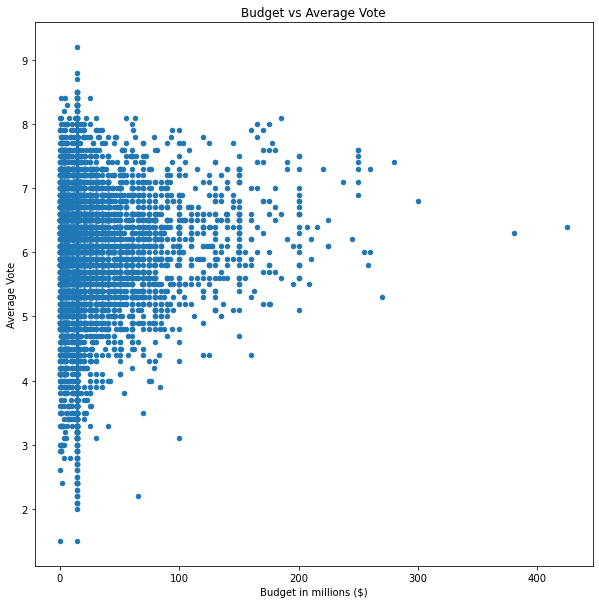

In [67]:
# A scatter plot for exploring correlation between budget and movie's average rating
budget = df_movies_final['budget'] / 1000000
budget_plot=pd.DataFrame()
budget_plot['budget']=budget
budget_plot['vote_average']=df_movies_final['vote_average']
budget_plot.plot(x='budget',y='vote_average',kind='scatter',figsize=(10,10));
plt.title('Budget vs Average Vote')
plt.xlabel('Budget in millions ($)');
plt.ylabel('Average Vote');


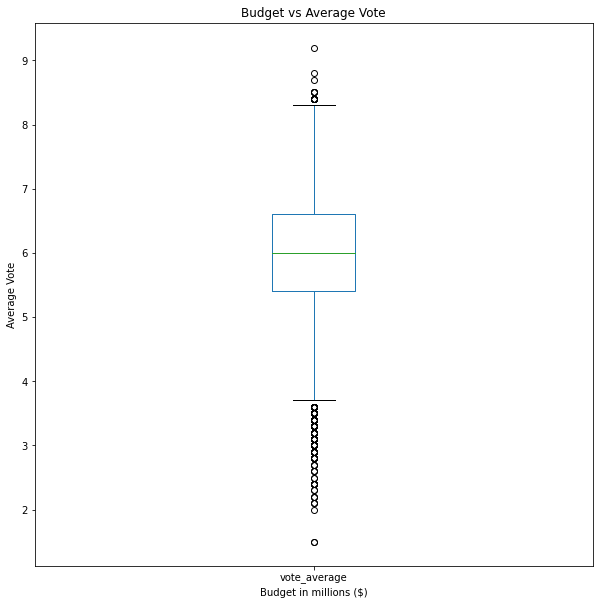

In [65]:
# plotting a box-plot to view any outliers

budget_plot.plot(x='budget',y='vote_average',kind='box',figsize=(10,10));
plt.title('Budget vs Average Vote')
plt.xlabel('Budget in millions ($)');
plt.ylabel('Average Vote');

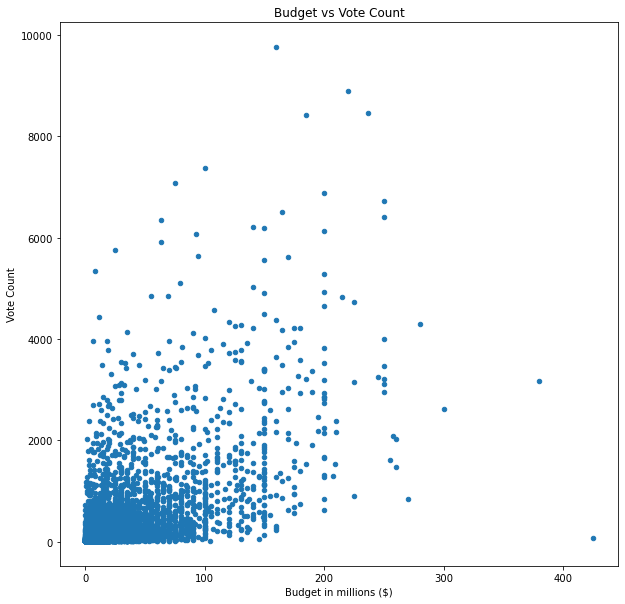

In [49]:
# A scatter plot for exploring correlation between budget and movie's absolute rating
budget = df_movies_final['budget'] / 1000000
budget_plot=pd.DataFrame()
budget_plot['budget']=budget
budget_plot['vote_count']=df_movies_final['vote_count']
budget_plot.plot(x='budget',y='vote_count',kind='scatter',figsize=(10,10));
plt.title('Budget vs Vote Count')
plt.xlabel('Budget in millions ($)');
plt.ylabel('Vote Count');

### Research Question 4: What are the top 10 directors in regard with the most profitable movie?

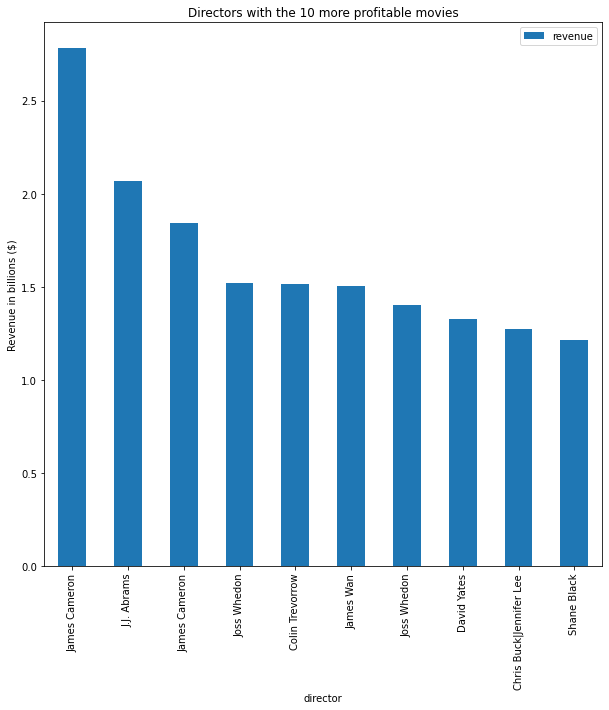

In [56]:
# Finding the top 10 most profitable movies and its directors

ten_movies = df_movies_final['revenue'].sort_values(ascending=False)[:10] / 1000000000

revenue_plot=pd.DataFrame()
directors=[]
revenue=[]
for i in ten_movies.index:
    directors.append(df_movies_final.loc[i,'director'])
    revenue.append(ten_movies.loc[i])
revenue_plot['director']=directors
revenue_plot['revenue']=revenue
revenue_plot.set_index('director',inplace=True)
revenue_plot.plot(kind ='bar',figsize=(10,10))
plt.title('Directors with the 10 more profitable movies');
plt.ylabel('Revenue in billions ($)');

In [72]:
# Name of the movie with the highest revenue
max_revenue = df_movies_final['revenue'].max()
df_movies_final[df_movies_final['revenue']==max_revenue]['original_title']

1386    Avatar
Name: original_title, dtype: object

<a id='conclusions'></a>
## Conclusions

> This report has analyzed the The Movie Database (TMDb) to determine the answers to following questions.

> -  Which is the top 10 of more expensive movies?
> -  How do budgets affect revenues?
> -  Is there a correlation between budget and movies' rating?
> -  What are the top 5 directors in regard with the most profitable movie?

> The most expensive movie is 'The Warrior's Way', costing 425 millions dollars and the tenth one had a budget of 250 millions dollars.

> From the plot and the corresponding table we can see that although there is a positive correlation between budget and revenue the movie with the highest revenue it is not in the first 10 of the most expensive movies. This shows that there are other factors (director, cast, genre, scenario maybe) that drove the movie so high. This has to be analyzed more to have more clear results.

> From the three plots one can conclude that as the budget grows so does the movie's rating, although again we have to consider other parameters.

> James Cameron holds the gold medal for the most profitable movie, which is 'Avatar' and the fact that this movie is not in the top 10 of moview with regard to budget its another clue that only the budget is not a crucial factor in order a movie to be succesfull regarding its acceptance by the audience and the profit that it will have.


<a id='cirations'></a>
## Citations

Some code from https://stackoverflow.com

The online documentations of pandas, numpy, and matplotlib.